### Importaci√≥n de datos



In [83]:
import pandas as pd
import matplotlib.pyplot as plt
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

Producto Categor√≠a del Producto    Precio  Costo de env√≠o  \
0  Asistente virtual           Electr√≥nicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodom√©sticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificaci√≥n  \
0      16/01/2021      Pedro Gomez          Bogot√°             4   
1      18/05/2022  Beatriz Morales        Medell√≠n             1   
2      15/03/2021   Juan Fernandez       Cartagena             1   
3      03/05/2022   Juan Fernandez            Cali             4   
4      07/11/2020    Maria Alfonso        Medell√≠n             5   

       M√©todo de pago  Cantidad de cuotas       lat       lon  
0  Tarjeta de cr√©dito                   8   4.60971 -74.08175  
1  Tarjeta de cr√©dito                   4   6.25184 -75.56359  
2  Tarjeta de cr√©dito                   1  10.39972 -75.51444  
3               Nequi                   1   3.43722 -76.52250  
4               Nequi                   1   6.25184 -75.56359

#1. An√°lisis de facturaci√≥n



In [109]:
tiendas = [tienda1, tienda2, tienda3, tienda4]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
Ingresos_Totales = list([tienda['Precio'].sum() for tienda in tiendas])
Ingresos_Totales

[np.float64(1150880400.0),
 np.float64(1116343500.0),
 np.float64(1098019600.0),
 np.float64(1038375700.0)]

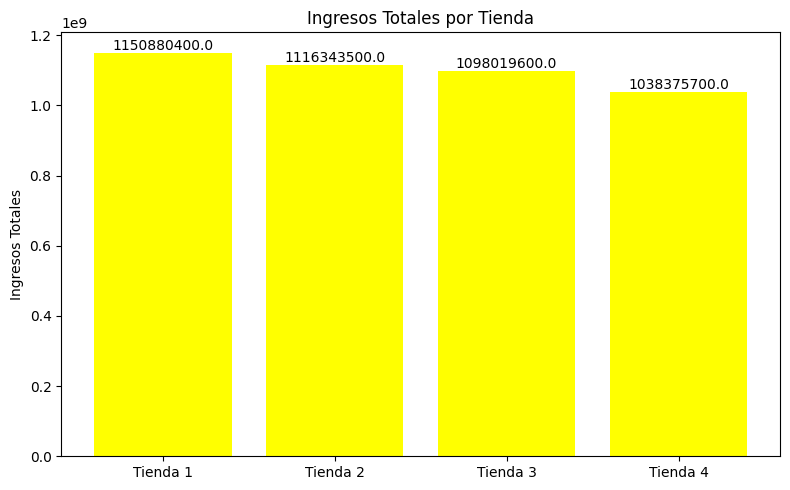

In [107]:
# Gr√°fico de barras

plt.figure(figsize=(8, 5))
barras = plt.bar(nombres_tiendas, Ingresos_Totales, color='yellow')
plt.ylabel('Ingresos Totales')
plt.title('Ingresos Totales por Tienda')

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, round(yval, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 2. Ventas por categor√≠a

In [97]:
conteo_categorias = [tienda['Categor√≠a del Producto'].value_counts() for tienda in tiendas]
populares_categoria = [categoria.idxmax() for categoria in conteo_categorias]
populares_cant = [categoria.max() for categoria in conteo_categorias]
print(populares_categoria)
print(populares_cant)

['Muebles', 'Muebles', 'Muebles', 'Muebles']
[465, 442, 499, 480]


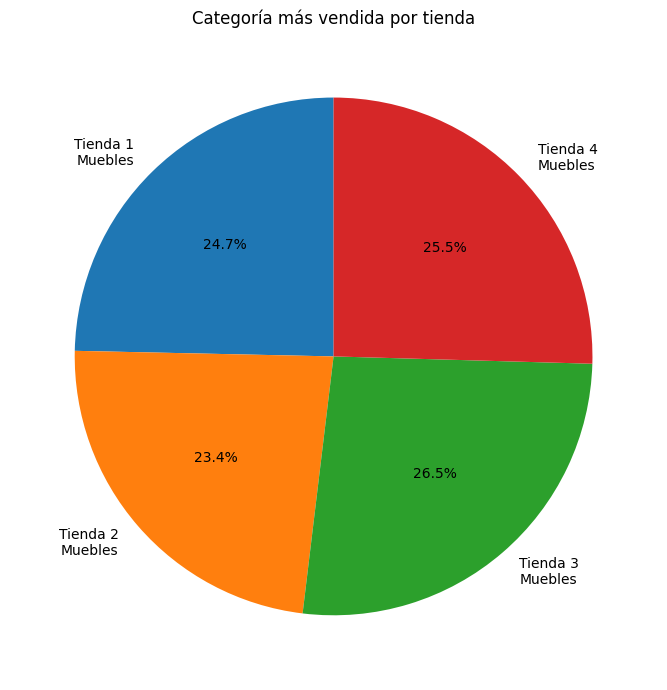

In [99]:
# Etiquetas para colocar nombre de la tienda y categor√≠a correspondiente
etiquetas = [f'{tienda}\n{categoria}' for tienda, categoria in zip(nombres_tiendas, populares_categoria)]

plt.figure(figsize=(7, 7))
plt.pie(populares_cant, labels=etiquetas, autopct='%1.1f%%', startangle=90)
plt.title('Categor√≠a m√°s vendida por tienda')
plt.tight_layout()
plt.show()

# 3. Calificaci√≥n promedio de la tienda


In [101]:
promedios = [round(tienda['Calificaci√≥n'].sum()/len(tienda['Calificaci√≥n']), 2) for tienda in tiendas]
print(promedios)

[np.float64(3.98), np.float64(4.04), np.float64(4.05), np.float64(4.0)]


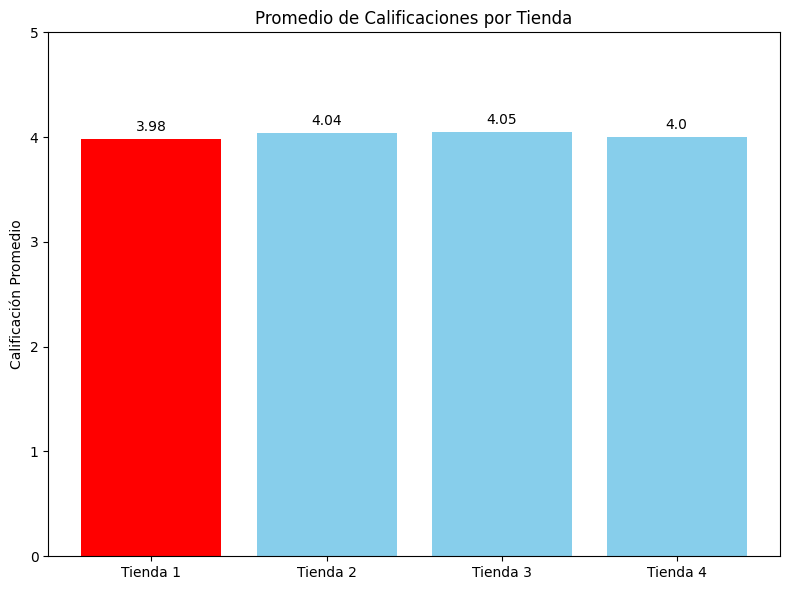

In [102]:
# Gr√°fico de barras
calif_min = promedios.index(min(promedios))
colores = ['skyblue' if i != calif_min else 'red' for i in range(len(promedios))]

plt.figure(figsize=(8, 6))
barras = plt.bar(nombres_tiendas, promedios, color=colores)

plt.title('Promedio de Calificaciones por Tienda')
plt.ylabel('Calificaci√≥n Promedio')
plt.ylim(0, 5)

for barra in barras:
    yval = barra.get_height()
    plt.text(barra.get_x() + barra.get_width()/2, yval + 0.05, round(yval, 2),
             ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 4. Productos m√°s y menos vendidos

In [82]:
conteo_productos = [tienda['Producto'].value_counts() for tienda in tiendas]

mas_vendidos = [(tienda.idxmax(), tienda.max()) for tienda in conteo_productos]
menos_vendidos = [(tienda.idxmin(), tienda.min()) for tienda in conteo_productos]

print(mas_vendidos)
print(menos_vendidos)

[('Microondas', 60), ('Iniciando en programaci√≥n', 65), ('Kit de bancas', 57), ('Cama box', 62)]
[('Auriculares con micr√≥fono', 33), ('Juego de mesa', 32), ('Bloques de construcci√≥n', 35), ('Guitarra el√©ctrica', 33)]


# 5. Env√≠o promedio por tienda

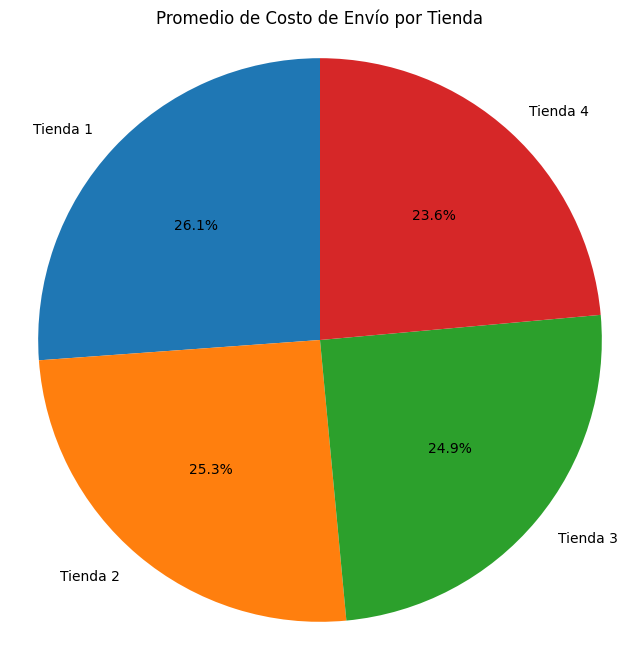

In [108]:
promedio_envios = [round(tienda['Costo de env√≠o'].sum()/len(tienda['Costo de env√≠o']), 2) for tienda in tiendas]

# Gr√°fica de pastel para comparar los gastos de env√≠o
plt.figure(figsize=(8, 8))
plt.pie(promedio_envios, labels=nombres_tiendas, autopct='%1.1f%%', startangle=90)

plt.title('Promedio de Costo de Env√≠o por Tienda')
plt.axis('equal')
plt.show()

In [110]:
promedio_envios

[np.float64(26018.61),
 np.float64(25216.24),
 np.float64(24805.68),
 np.float64(23459.46)]

# 6. Informe final

## Introducci√≥n

El presente informe tiene como objetivo analizar el desempe√±o de cuatro tiendas de la cadena Alura Store, perteneciente al Sr. Juan, con el fin de determinar cu√°l de ellas conviene vender para iniciar un nuevo emprendimiento. Para ello, se evaluaron diversos factores clave: ingresos totales, productos m√°s y menos vendidos, categor√≠as m√°s populares, calificaciones de los clientes y costos de env√≠o. Este an√°lisis se complement√≥ con visualizaciones gr√°ficas que facilitaron la comparaci√≥n entre las tiendas.

---

## An√°lisis de Resultados

### 1. Ingresos Totales

Los ingresos brutos por tienda fueron los siguientes:

- **Tienda 1**: \$1,150,880,400
- **Tienda 2**: \$1,116,343,500
- **Tienda 3**: \$1,098,019,600
- **Tienda 4**: \$1,038,375,700

### 2. Calificaci√≥n Promedio de Clientes

Las calificaciones revelan la satisfacci√≥n del cliente:

- **Tienda 1**: 3.98 (la m√°s baja)
- **Tienda 2**: 4.04
- **Tienda 3**: 4.05 (la m√°s alta)
- **Tienda 4**: 4.00

Esto indica que **Tienda 1 tiene oportunidades de mejora en calidad o servicio al cliente**.

### 3. Categor√≠a M√°s Popular

En todas las tiendas, la categor√≠a **Muebles** fue la m√°s vendida:

- Tienda 1: 465
- Tienda 2: 442
- Tienda 3: 499 ü•á
- Tienda 4: 480

La **demanda por muebles** es una constante entre tiendas, es importante destacar que las tiendas 3 y 4 son las que m√°s art√≠culos han vendido en esta categor√≠a.

### 4. Productos M√°s y Menos Vendidos

- M√°s vendidos: ‚ÄúMicroondas‚Äù, ‚ÄúIniciando en programaci√≥n‚Äù, ‚ÄúKit de bancas‚Äù, ‚ÄúCama box‚Äù
- Menos vendidos: ‚ÄúAuriculares con micr√≥fono‚Äù, ‚ÄúJuego de mesa‚Äù, ‚ÄúBloques de construcci√≥n‚Äù, ‚ÄúGuitarra el√©ctrica‚Äù

Estos resultados ayudan a ajustar el cat√°logo de productos para tener correcta disponibilidad de los productos m√°s demandados y verificar los productos que deben seguir en venta para evitar p√©rdidas.

En el an√°lisis de estos datos se puede notar que las tiendas 1 y 3 son las que menos cantidad de productos populares venden.

### 5. Costos de Env√≠o Promedio

- **Tienda 1**: \$26,018.61
- **Tienda 2**: \$25,216.24
- **Tienda 3**: \$24,805.68
- **Tienda 4**: \$23,459.46

El alto costo en Tienda 1 afecta directamente su competitividad log√≠stica.

---

## Conclusi√≥n

Despu√©s de analizar todos los indicadores clave, se recomienda que el Sr. Juan **venda la Tienda 1**. Aunque es la tienda con **mayores ingresos**, no necesariamente es la que representa mayores ganancias, ya que presenta **varias debilidades importantes**:

- **La calificaci√≥n m√°s baja**, lo que puede reflejar problemas de calidad, log√≠stica o servicio al cliente.
- **El costo de env√≠o m√°s alto**, lo cual podr√≠a limitar su competitividad futura y rentabilidad.
- Podr√≠a enfrentar **problemas de reputaci√≥n a largo plazo** si no se corrigen los aspectos que le han hecho obtener la calificaci√≥n m√°s baja.

Vender la Tienda 1 permitir√≠a capitalizar sus ingresos actuales, evitando un posible deterioro de su desempe√±o, y reinvertir en otra tienda con **mejor calificaci√≥n, menores costos y potencial de crecimiento**, como la Tienda 3 o un nuevo emprendimiento.

Al ser un buen momento en cuanto a ingresos para la Tienda 1, se puede llegar a un acuerdo favorable para venderla.

Esta decisi√≥n se respalda tanto en los datos num√©ricos como en las visualizaciones gr√°ficas que permiten ver claramente las fortalezas y debilidades de cada tienda.

---
